In [1]:
from sklearn.datasets import load_files       

import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from glob import glob

In [2]:
epochs = 30

In [3]:
def extract_VGG16(tensor):
	from keras.applications.vgg16 import VGG16, preprocess_input
	return VGG16(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

In [4]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

basedir = 'dogbreed model 2/'
# load train, test, and validation datasets
train_files, train_targets = load_dataset(basedir+'dogImages/train')
valid_files, valid_targets = load_dataset(basedir+'dogImages/valid')
test_files, test_targets = load_dataset(basedir+'dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogbreed model 2/dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [5]:
import random
random.seed(8629805)

In [6]:
import matplotlib.pyplot as plt    

In [7]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

## Use a CNN with transger learning to Classify Dog Breeds

###### VGG16

In [8]:
bottleneck_features = np.load(basedir+'bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

In [9]:
train_VGG16.shape

(6680, 7, 7, 512)

In [10]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


2022-08-03 00:49:05.966836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 00:49:05.967298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 00:49:05.971161: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 00:49:05.971591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 00:49:05.972009: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [11]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='savedModelDogBreed2.weights.best.VGG16.hdf5', verbose=1, save_best_only=True)

#EPOCHS = 3

VGG16_history = VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

2022-08-03 00:49:08.257946: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
133/334 [==========>...................] - ETA: 0s - loss: 13.1006 - accuracy: 0.0647    

2022-08-03 00:49:08.859173: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


334/334 [==============================] - 1s 2ms/step - loss: 8.1802 - accuracy: 0.2187 - val_loss: 3.6709 - val_accuracy: 0.4371

Epoch 00001: val_loss improved from inf to 3.67091, saving model to savedModelDogBreed2.weights.best.VGG16.hdf5
Epoch 2/30
334/334 [==============================] - 0s 1ms/step - loss: 2.1901 - accuracy: 0.5991 - val_loss: 2.3507 - val_accuracy: 0.5988

Epoch 00002: val_loss improved from 3.67091 to 2.35067, saving model to savedModelDogBreed2.weights.best.VGG16.hdf5
Epoch 3/30
334/334 [==============================] - 0s 1ms/step - loss: 1.2189 - accuracy: 0.7445 - val_loss: 2.1256 - val_accuracy: 0.6251

Epoch 00003: val_loss improved from 2.35067 to 2.12565, saving model to savedModelDogBreed2.weights.best.VGG16.hdf5
Epoch 4/30
334/334 [==============================] - 0s 1ms/step - loss: 0.8006 - accuracy: 0.8169 - val_loss: 1.9678 - val_accuracy: 0.6790

Epoch 00004: val_loss improved from 2.12565 to 1.96781, saving model to savedModelDogBreed2.wei

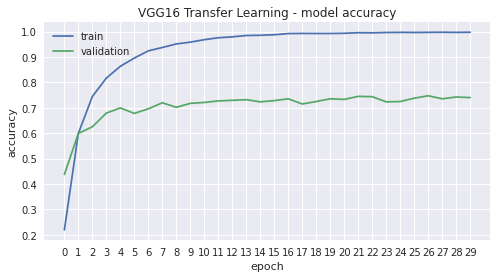

In [13]:
epochs = epochs
plt.style.use('seaborn')
plt.figure(figsize=(8,4))
plt.plot(VGG16_history.history['accuracy'])
plt.plot(VGG16_history.history['val_accuracy'])
plt.title('VGG16 Transfer Learning - model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
_ = plt.xticks(range(0, epochs))

In [14]:
VGG16_model.load_weights('savedModelDogBreed2.weights.best.VGG16.hdf5')

In [15]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 73.0861%


In [16]:
#from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

## Predictions

In [20]:
import cv2 

In [31]:
img_path = basedir+'imageChecks/Doberman-2-645mk062111.jpg'
print("My prediction is")
VGG16_predict_breed(img_path)

    

My prediction is


'Images/train/059.Doberman_pinscher'

The evaluated image:


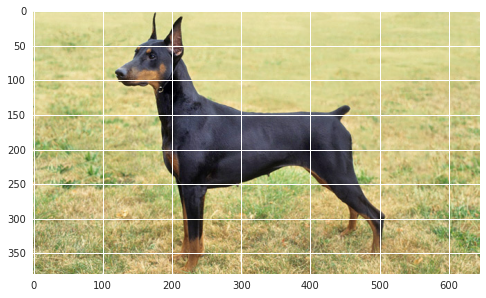

In [26]:
print("The evaluated image:")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [32]:
img_path = basedir+'imageChecks/Curly-coated_retriever_03896.jpg'
print("My prediction is")
VGG16_predict_breed(img_path)

My prediction is


'Images/train/055.Curly-coated_retriever'

In [33]:
img_path = basedir+'imageChecks/Lassie.jpg'
print("My prediction is")
VGG16_predict_breed(img_path)

My prediction is


'Images/train/012.Australian_shepherd'

###### Result ebvaluation

The model have a test accuracy of: Test accuracy: 73.0861%
<br>
2 out of three predicted images are correct (Doberman and Curly coated retriever)
<br><br>
The saved model has the name: savedModelDogBreed2.weights.best.VGG16.hdf5